In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [72]:
# задание 1
df = pd.read_csv("Данные для дз5 Корреляции.csv", sep=';')

(array([ 29.,  36.,   5.,  12.,  10.,   7.,  13.,  12.,   8.,  24.,  24.,
          7.,  10.,  18.,  10.,  26.,  15.,  26.,  17.,  16.,  65.,  21.,
         26.,  18.,  32.,  33.,  13.,  24.,  14.,  15.,  23.,  10.,  13.,
         11.,  14.,  13.,  33.,   8.,   9.,  18.,  22.,  11.,   6.,  12.,
         11., 152.,  12.,  36.,   5.,   6.,  21.,   8.,  12.,  14.,  34.,
         27.,   3.,   4.,   0.,  13.,   9.,   3.,  14.,   4.,   9.,  12.,
         14.,   7.,   2.,   6.,   5.,   8.,   9.,   8.,  11.,   7.,  15.,
         13.,  10.,   8.,  17.,  13.,   3.,   5.,   5.,   5.,   4.,   3.,
          4.,   4.,   5.,   2.,   6.,   5.,   5.,   4.,   4.,   4.,   8.,
          8.]),
 array([ 50. ,  51.1,  52.2,  53.3,  54.4,  55.5,  56.6,  57.7,  58.8,
         59.9,  61. ,  62.1,  63.2,  64.3,  65.4,  66.5,  67.6,  68.7,
         69.8,  70.9,  72. ,  73.1,  74.2,  75.3,  76.4,  77.5,  78.6,
         79.7,  80.8,  81.9,  83. ,  84.1,  85.2,  86.3,  87.4,  88.5,
         89.6,  90.7,  91.8,  92.9

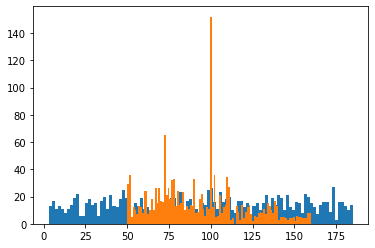

In [73]:
plt.hist(df['PHYSICS'], bins=100)
plt.hist(df['BLOOD'], bins=100)
# нормального распределения тут не наблюдается

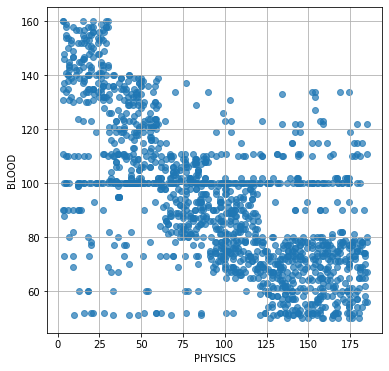

In [74]:
plt.figure(figsize=(6, 6))  
plt.xlabel('PHYSICS') 
plt.ylabel('BLOOD') 
plt.grid() 
plt.scatter(df['PHYSICS'], df['BLOOD'], alpha = 0.7 )
# что-то похожее на корреляцию разглядеть можно, но с большим трудом

In [150]:
def proxi_ranges(x,y,a=0.05):
    var_x = x.var()
    var_y = y.var()
    cov_x_y = np.cov(x,y)
    print('Дисперсия первого массива = {0}, дисперсия второго массива = {1}, ковариационная матрица = \n {2}'.format(var_x, var_y, cov_x_y))
    s, p = spearmanr(x, y)
    s1, p1 = pearsonr(x, y)
    if p>a:
        print('Корреляция Спирмена равна нулю')
    elif p<0.3:
        print('Корреляция Спирмена слабая')
    elif p>=0.3 and p<=0.7:
        print('Корреляция Спирмена средняя')
    else:
        print('Корреляция Спирмена сильная')
    if p1>a:
        print('Корреляция Пирсона равна нулю')
    elif p1<0.3:
        print('Корреляция Пирсона слабая')
    elif p1>=0.3 and p<=0.7:
        print('Корреляция Пирсона средняя')
    else:
        print('Корреляция Пирсона сильная')
    

In [151]:
proxi_ranges(df['PHYSICS'],df['BLOOD'])

Дисперсия первого массива = 2669.462284295293, дисперсия второго массива = 726.6351425558502, ковариационная матрица = 
 [[2669.4622843  -921.46692325]
 [-921.46692325  726.63514256]]
Корреляция Спирмена слабая
Корреляция Пирсона слабая


In [77]:
# задание 2
df1 = pd.read_csv("Данные для дз5 Манн-Уитни.csv", sep=';')

In [136]:
# избавились от NaN значений
df2 = df1[df1['BLOOD2'].notnull()]

(array([ 33.,  95., 107., 141., 112.,  84.,  11.,   9.,  11.,   2.]),
 array([ 60.,  68.,  76.,  84.,  92., 100., 108., 116., 124., 132., 140.]),
 <BarContainer object of 10 artists>)

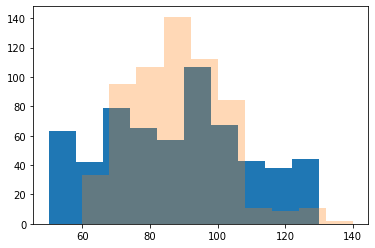

In [145]:
plt.hist(df2['BLOOD1'])
plt.hist(df2['BLOOD2'], alpha=0.3)

In [140]:
def mann_whitney_func(x,y,a=0.05):
    u, p_value = mannwhitneyu(x, y, alternative = 'two-sided')
    t, p_value_avg = ttest_ind(x,y)
    if p_value<a:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    if p_value < a:
        print('Средние не равны')
    else:
        print('Средние равны')
    return(u, p_value)

In [143]:
mann_whitney_func(df2['BLOOD1'],df2['BLOOD2'] )

Распределения равны
Средние равны


(178857.0, 0.49411579709672515)